In [7]:
import json

with open('cwe25.json', 'r') as f:
    data = json.load(f)

In [3]:
def extract_cwe(possible_options, cwe25):
    for cwe in cwe25:
        for possible_id in possible_options:
            possible_id = possible_id[4:]

            if possible_id == cwe['id']:
                return cwe['id'], cwe['name'], cwe['description']

    return '', '', ''

In [5]:
def extract_cwe_id(possible_options, cwe25):
    for cwe in cwe25:
        for possible_id in possible_options:
            possible_id = possible_id[4:]

            if possible_id == cwe['id']:
                return f"CWE-{cwe['id']}"

    return ''

In [9]:
extract_cwe(ast.literal_eval(df.cwe_id.iloc[4]), data)

('269',
 'Improper Privilege Management',
 'The product does not properly assign, modify, track, or check privileges for an actor, creating an unintended sphere of control for that actor.')

In [1]:
import pandas as pd

df = pd.read_csv('vul7.csv')
df.shape

(2621, 14)

In [2]:
df.head()

,file_name,method_name,code_before,code_after,func_before,func_after,diff,num_lines_added,num_lines_deleted,num_lines_in_file,num_tokens_in_file,repo,cve_id,cwe_id
0,open_utils.c,read_new_config_info,//////////////////////////////////////////////...,//////////////////////////////////////////////...,static int read_new_config_info (WavpackContex...,static int read_new_config_info (WavpackContex...,"{'added': [(563, ' if (bytecnt >= 2) {'), (...",5.0,1.0,825.0,6305.0,https://github.com/dbry/WavPack,CVE-2016-10169,['CWE-125']
1,route.c,inet_rtm_getroute,/*\n * INET\t\tAn implementation of the TCP/IP...,/*\n * INET\t\tAn implementation of the TCP/IP...,static int inet_rtm_getroute(struct sk_buff *i...,static int inet_rtm_getroute(struct sk_buff *i...,"{'added': [(2766, '\tif (rtm->rtm_flags & RTM_...",9.0,2.0,2327.0,14667.0,https://github.com/torvalds/linux,CVE-2017-13686,['CWE-476']
2,main.c,mp4boxMain,/*\n *\t\t\tGPAC - Multimedia Framework C SDK\...,/*\n *\t\t\tGPAC - Multimedia Framework C SDK\...,"int mp4boxMain(int argc, char **argv)\n{\n\tu3...","int mp4boxMain(int argc, char **argv)\n{\n\tu3...","{'added': [(5598, '\t\t\tfprintf(stderr, ""File...",1.0,1.0,5787.0,43960.0,https://github.com/gpac/gpac,CVE-2020-23930,['CWE-476']
3,udp.c,udpv6_sendmsg,/*\n *\tUDP over IPv6\n *\tLinux INET6 impleme...,/*\n *\tUDP over IPv6\n *\tLinux INET6 impleme...,"int udpv6_sendmsg(struct sock *sk, struct msgh...","int udpv6_sendmsg(struct sock *sk, struct msgh...","{'added': [(1113, '\tstruct ipv6_txoptions *op...",6.0,2.0,1221.0,7876.0,https://github.com/torvalds/linux,CVE-2016-3841,"['CWE-264', 'CWE-416']"
4,api.c,crypto_larval_lookup,/*\n * Scatterlist Cryptographic API.\n *\n * ...,/*\n * Scatterlist Cryptographic API.\n *\n * ...,struct crypto_alg *crypto_larval_lookup(const ...,struct crypto_alg *crypto_larval_lookup(const ...,"{'added': [(219, '\t\trequest_module(""crypto-%...",2.0,2.0,424.0,2423.0,https://github.com/torvalds/linux,CVE-2013-7421,['CWE-269']


In [3]:
import ast
df.cwe_id = df.cwe_id.apply(ast.literal_eval)

In [8]:
df['exp_cwe_id'] = df.cwe_id.apply(lambda x: extract_cwe_id(x, data))

In [9]:
df.exp_cwe_id.value_counts()

exp_cwe_id
CWE-125    558
CWE-119    480
CWE-787    303
CWE-20     284
CWE-476    260
CWE-416    238
CWE-190    191
CWE-362    149
CWE-78      30
CWE-269     28
CWE-287     22
CWE-276     21
CWE-22      14
CWE-863     12
CWE-79       8
CWE-352      6
CWE-77       6
CWE-89       5
CWE-862      4
CWE-94       1
CWE-434      1
Name: count, dtype: int64

In [10]:
def filter_and_select_rows(df):
    allowed_cwe_ids = ['CWE-125', 'CWE-119', 'CWE-787', 'CWE-20', 'CWE-476', 'CWE-416', 'CWE-190', 'CWE-362']
    
    df = df[df['exp_cwe_id'].isin(allowed_cwe_ids)]
    df.reset_index(drop=True, inplace=True)
    
    result_df = pd.DataFrame()
    for cwe_id in allowed_cwe_ids:
        subset = df[df['exp_cwe_id'] == cwe_id]
        subset_sorted = subset.nsmallest(125, 'num_tokens_in_file')
        result_df = pd.concat([result_df, subset_sorted])
    
    result_df.reset_index(drop=True, inplace=True)
    return result_df

In [11]:
final_df = filter_and_select_rows(df)

In [12]:
final_df.shape

(1000, 15)

In [13]:
final_df.head()

,file_name,method_name,code_before,code_after,func_before,func_after,diff,num_lines_added,num_lines_deleted,num_lines_in_file,num_tokens_in_file,repo,cve_id,cwe_id,exp_cwe_id
0,snmp-api.c,snmp_api_set_oid,/*\n * Copyright (C) 2019 Yago Fontoura do Ros...,/*\n * Copyright (C) 2019-2020 Yago Fontoura d...,"snmp_api_set_oid(snmp_varbind_t *varbind, uint...","snmp_api_set_oid(snmp_varbind_t *varbind, snmp...","{'added': [(2, ' * Copyright (C) 2019-2020 Yag...",11.0,27.0,31.0,184.0,https://github.com/contiki-ng/contiki-ng,CVE-2020-12141,[CWE-125],CWE-125
1,snmp-api.c,snmp_api_set_string,/*\n * Copyright (C) 2019 Yago Fontoura do Ros...,/*\n * Copyright (C) 2019-2020 Yago Fontoura d...,"snmp_api_set_string(snmp_varbind_t *varbind, u...","snmp_api_set_string(snmp_varbind_t *varbind, s...","{'added': [(2, ' * Copyright (C) 2019-2020 Yag...",11.0,27.0,31.0,184.0,https://github.com/contiki-ng/contiki-ng,CVE-2020-12141,[CWE-125],CWE-125
2,snmp-api.c,snmp_api_set_time_ticks,/*\n * Copyright (C) 2019 Yago Fontoura do Ros...,/*\n * Copyright (C) 2019-2020 Yago Fontoura d...,snmp_api_set_time_ticks(snmp_varbind_t *varbin...,snmp_api_set_time_ticks(snmp_varbind_t *varbin...,"{'added': [(2, ' * Copyright (C) 2019-2020 Yag...",11.0,27.0,31.0,184.0,https://github.com/contiki-ng/contiki-ng,CVE-2020-12141,[CWE-125],CWE-125
3,heap_overflow.c,main,/**\n * Test that the crafted TGA file doesn't...,/**\n * Test that crafted TGA files don't trig...,int main()\n{\n gdImagePtr im;\n char *b...,"int main()\n{\n check_file(""heap_overflow_1...","{'added': [(2, "" * Test that crafted TGA files...",12.0,4.0,39.0,233.0,https://github.com/libgd/libgd,CVE-2016-6906,[CWE-125],CWE-125
4,grammar1.c,Ta3Grammar_FindDFA,\n/* Grammar subroutines needed by parser */\n...,\n/* Grammar subroutines needed by parser */\n...,"Ta3Grammar_FindDFA(grammar *g, int type)\n{\n ...","Ta3Grammar_FindDFA(grammar *g, int type)\n{\n ...","{'added': [(28, ' abort();')], 'deleted': [...",1.0,2.0,46.0,234.0,https://github.com/python/typed_ast,CVE-2019-19274,[CWE-125],CWE-125


In [14]:
final_df.exp_cwe_id.value_counts()

exp_cwe_id
CWE-125    125
CWE-119    125
CWE-787    125
CWE-20     125
CWE-476    125
CWE-416    125
CWE-190    125
CWE-362    125
Name: count, dtype: int64

In [15]:
final_df.to_csv('test_vulC7.csv', index=False)

In [20]:
df.head()

,file_name,method_name,code_before,code_after,func_before,func_after,diff,num_lines_added,num_lines_deleted,num_lines_in_file,num_tokens_in_file,repo,cve_id,cwe_id,exp_cwe_id
0,open_utils.c,read_new_config_info,//////////////////////////////////////////////...,//////////////////////////////////////////////...,static int read_new_config_info (WavpackContex...,static int read_new_config_info (WavpackContex...,"{'added': [(563, ' if (bytecnt >= 2) {'), (...",5.0,1.0,825.0,6305.0,https://github.com/dbry/WavPack,CVE-2016-10169,[CWE-125],CWE-125
1,route.c,inet_rtm_getroute,/*\n * INET\t\tAn implementation of the TCP/IP...,/*\n * INET\t\tAn implementation of the TCP/IP...,static int inet_rtm_getroute(struct sk_buff *i...,static int inet_rtm_getroute(struct sk_buff *i...,"{'added': [(2766, '\tif (rtm->rtm_flags & RTM_...",9.0,2.0,2327.0,14667.0,https://github.com/torvalds/linux,CVE-2017-13686,[CWE-476],CWE-476
2,main.c,mp4boxMain,/*\n *\t\t\tGPAC - Multimedia Framework C SDK\...,/*\n *\t\t\tGPAC - Multimedia Framework C SDK\...,"int mp4boxMain(int argc, char **argv)\n{\n\tu3...","int mp4boxMain(int argc, char **argv)\n{\n\tu3...","{'added': [(5598, '\t\t\tfprintf(stderr, ""File...",1.0,1.0,5787.0,43960.0,https://github.com/gpac/gpac,CVE-2020-23930,[CWE-476],CWE-476
3,udp.c,udpv6_sendmsg,/*\n *\tUDP over IPv6\n *\tLinux INET6 impleme...,/*\n *\tUDP over IPv6\n *\tLinux INET6 impleme...,"int udpv6_sendmsg(struct sock *sk, struct msgh...","int udpv6_sendmsg(struct sock *sk, struct msgh...","{'added': [(1113, '\tstruct ipv6_txoptions *op...",6.0,2.0,1221.0,7876.0,https://github.com/torvalds/linux,CVE-2016-3841,"[CWE-264, CWE-416]",CWE-416
4,api.c,crypto_larval_lookup,/*\n * Scatterlist Cryptographic API.\n *\n * ...,/*\n * Scatterlist Cryptographic API.\n *\n * ...,struct crypto_alg *crypto_larval_lookup(const ...,struct crypto_alg *crypto_larval_lookup(const ...,"{'added': [(219, '\t\trequest_module(""crypto-%...",2.0,2.0,424.0,2423.0,https://github.com/torvalds/linux,CVE-2013-7421,[CWE-269],CWE-269


In [21]:
allowed_cwe_ids = ['CWE-125', 'CWE-119', 'CWE-787', 'CWE-20', 'CWE-476', 'CWE-416', 'CWE-190', 'CWE-362']
    
df = df[df['exp_cwe_id'].isin(allowed_cwe_ids)]

In [23]:
df.reset_index(drop=True, inplace=True)

In [24]:
df.head()

,file_name,method_name,code_before,code_after,func_before,func_after,diff,num_lines_added,num_lines_deleted,num_lines_in_file,num_tokens_in_file,repo,cve_id,cwe_id,exp_cwe_id
0,open_utils.c,read_new_config_info,//////////////////////////////////////////////...,//////////////////////////////////////////////...,static int read_new_config_info (WavpackContex...,static int read_new_config_info (WavpackContex...,"{'added': [(563, ' if (bytecnt >= 2) {'), (...",5.0,1.0,825.0,6305.0,https://github.com/dbry/WavPack,CVE-2016-10169,[CWE-125],CWE-125
1,route.c,inet_rtm_getroute,/*\n * INET\t\tAn implementation of the TCP/IP...,/*\n * INET\t\tAn implementation of the TCP/IP...,static int inet_rtm_getroute(struct sk_buff *i...,static int inet_rtm_getroute(struct sk_buff *i...,"{'added': [(2766, '\tif (rtm->rtm_flags & RTM_...",9.0,2.0,2327.0,14667.0,https://github.com/torvalds/linux,CVE-2017-13686,[CWE-476],CWE-476
2,main.c,mp4boxMain,/*\n *\t\t\tGPAC - Multimedia Framework C SDK\...,/*\n *\t\t\tGPAC - Multimedia Framework C SDK\...,"int mp4boxMain(int argc, char **argv)\n{\n\tu3...","int mp4boxMain(int argc, char **argv)\n{\n\tu3...","{'added': [(5598, '\t\t\tfprintf(stderr, ""File...",1.0,1.0,5787.0,43960.0,https://github.com/gpac/gpac,CVE-2020-23930,[CWE-476],CWE-476
3,udp.c,udpv6_sendmsg,/*\n *\tUDP over IPv6\n *\tLinux INET6 impleme...,/*\n *\tUDP over IPv6\n *\tLinux INET6 impleme...,"int udpv6_sendmsg(struct sock *sk, struct msgh...","int udpv6_sendmsg(struct sock *sk, struct msgh...","{'added': [(1113, '\tstruct ipv6_txoptions *op...",6.0,2.0,1221.0,7876.0,https://github.com/torvalds/linux,CVE-2016-3841,"[CWE-264, CWE-416]",CWE-416
4,mpeg4videodec.c,read_quant_matrix_ext,"/*\n * MPEG-4 decoder\n * Copyright (c) 2000,2...","/*\n * MPEG-4 decoder\n * Copyright (c) 2000,2...",static void read_quant_matrix_ext(MpegEncConte...,static int read_quant_matrix_ext(MpegEncContex...,"{'added': [(2870, 'static int read_quant_matri...",10.0,1.0,2824.0,24222.0,https://github.com/FFmpeg/FFmpeg,CVE-2018-1999015,[CWE-125],CWE-125


In [1]:
import pandas as pd
import os

def calculate_metrics(df):
    tp = 0
    fp = 0
    tn = 0
    fn = 0

    for i in range(df.shape[0]):
        res_before = str(df['res_func_before'].iloc[i]).lower()
        res_after = str(df['res_func_after'].iloc[i]).lower()

        if 'yes' in res_before:
            tp += 1
        else:
            fn += 1

        if 'yes' in res_after:
            fp += 1
        else:
            tn += 1

    return tp, fp, tn, fn

model_map = {
    'codeLlama': '[meta-llama/CodeLlama-7b-hf](https://huggingface.co/meta-llama/CodeLlama-7b-hf)',
    'codeQwen': '[Qwen/CodeQwen1.5-7B-Chat](https://huggingface.co/Qwen/CodeQwen1.5-7B-Chat)',
    'deepSeekCoder': '[deepseek-ai/deepseek-coder-6.7b-instruct](https://huggingface.co/deepseek-ai/deepseek-coder-6.7b-instruct)',
    'gemma': '[google/gemma-7b](https://huggingface.co/google/gemma-7b)',
    'llama3': '[meta-llama/Meta-Llama-3-8B-Instruct](https://huggingface.co/meta-llama/Meta-Llama-3-8B-Instruct)',
    'mistral': '[mistralai/Mistral-7B-Instruct-v0.2](https://huggingface.co/mistralai/Mistral-7B-Instruct-v0.2)',
    'qwen': '[Qwen/Qwen1.5-7B-Chat](https://huggingface.co/Qwen/Qwen1.5-7B-Chat)',
}

In [6]:
table = "| Model Name | TP | FP | TN | FN |\n"
table += "|------------|----|----|----|----|\n"

csv_files = [file for file in os.listdir() if file.endswith('.csv') and 'res0_vulC7' in file and 'test' not in file]

csv_files.sort()

for csv_file in csv_files:
    model_name = csv_file.split('vulC7_')[1].split('.csv')[0]
    
    df = pd.read_csv(csv_file)
    tp, fp, tn, fn = calculate_metrics(df)
    table += f"| {model_map[model_name]} | {tp} | {fp} | {tn} | {fn} |\n"

print(table)


| Model Name | TP | FP | TN | FN |
|------------|----|----|----|----|
| [meta-llama/CodeLlama-7b-hf](https://huggingface.co/meta-llama/CodeLlama-7b-hf) | 0 | 0 | 2621 | 2621 |
| [Qwen/CodeQwen1.5-7B-Chat](https://huggingface.co/Qwen/CodeQwen1.5-7B-Chat) | 0 | 0 | 2621 | 2621 |
| [deepseek-ai/deepseek-coder-6.7b-instruct](https://huggingface.co/deepseek-ai/deepseek-coder-6.7b-instruct) | 29 | 28 | 2593 | 2592 |
| [google/gemma-7b](https://huggingface.co/google/gemma-7b) | 22 | 22 | 2599 | 2599 |
| [meta-llama/Meta-Llama-3-8B-Instruct](https://huggingface.co/meta-llama/Meta-Llama-3-8B-Instruct) | 0 | 0 | 2621 | 2621 |
| [mistralai/Mistral-7B-Instruct-v0.2](https://huggingface.co/mistralai/Mistral-7B-Instruct-v0.2) | 29 | 28 | 2593 | 2592 |
| [Qwen/Qwen1.5-7B-Chat](https://huggingface.co/Qwen/Qwen1.5-7B-Chat) | 0 | 0 | 2621 | 2621 |



In [31]:
import pandas as pd

df = pd.read_csv('kat_res/new_res_D1_llama3.csv')
df.shape

(1000, 5)

In [32]:
df.head()

,id,res_before,res_after,pred_before,pred_after
0,0,"Yes, the code contains instances of the securi...","Yes, the code contains an instance of the secu...",1,1
1,1,"Yes, the code contains an instance of the secu...","Yes, this code contains an out-of-bounds read ...",1,1
2,2,"Yes, the code contains an instance of the secu...","Yes, this code is vulnerable to an Out-of-boun...",1,1
3,3,"Yes, this code is vulnerable to an out-of-boun...","Yes, the code contains instances of Out-of-bou...",1,1
4,4,"Yes, the code contains an instance of the Out-...","Yes, this code contains an instance of Out-of-...",1,1


In [34]:
print(df.res_before.iloc[108])

Yes, this code is vulnerable to an Out-of-bounds Read.

Explanation:
In the loop where the current dfa and state are fetched, the code checks if the state is in an accept-only state. If it is, the code pops the stack until it is no longer in an accept-only state. This code does not check if the state is out of bounds, which could lead to a buffer overflow or out-of-bounds read. 

Additionally, the code does not check if the dfa or state pointers are valid before accessing them. This could also lead to a buffer overflow or out-of-bounds read. 

It's also worth noting that the code has some other issues, such as lack of error handling, and potentially uninitialized variables. 

It's recommended to fix these issues and also add proper bounds checking to prevent any potential security vulnerabilities. 

Also, the code is using some deprecated functions and features, it's recommended to update it to use the latest and safest methods and features. 

It's also recommended to use a static anal

In [5]:
from utils import *
tp, fp, tn, fn, na_b, na_a = calculate_metrics(df, 'pred_before', 'pred_after')

In [6]:
tp, fp, tn, fn, na_b, na_a

(912, 914, 7, 12, 76, 79)

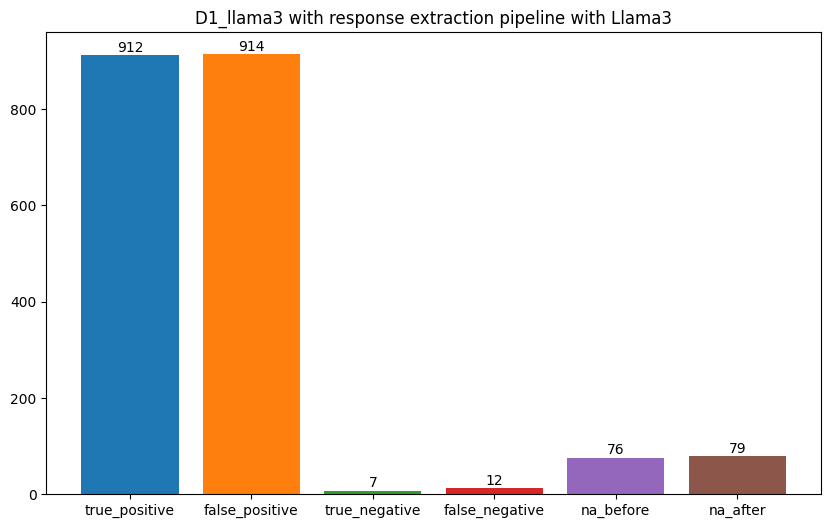

In [15]:
import matplotlib.pyplot as plt

values = [tp, fp, tn, fn, na_b, na_a]
labels = ['true_positive', 'false_positive', 'true_negative', 'false_negative', 'na_before', 'na_after']

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=plt.get_cmap('tab10').colors)

plt.title('D1_llama3 with response extraction pipeline with Llama3')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')

plt.show()


In [19]:
import os
table = "| Experiment | TP | FP | TN | FN | NA_B | NA_A\n"
table += "|------------|----|----|----|----|----|----|\n"

csv_files = [file for file in os.listdir('kat_res/') if file.endswith('.csv') and 'new' in file]

csv_files.sort()

for csv_file in csv_files:
    experiment_name = csv_file.split('new_res_')[1].split('.csv')[0]
    
    df = pd.read_csv(f"kat_res/{csv_file}")
    tp, fp, tn, fn, na_b, na_a = calculate_metrics(df, 'pred_before', 'pred_after')
    table += f"| {experiment_name} | {tp} | {fp} | {tn} | {fn} |{na_b} |{na_a} |\n"

print(table)

| Experiment | TP | FP | TN | FN | NA_B | NA_A
|------------|----|----|----|----|----|----|
| D1_llama3 | 912 | 914 | 7 | 12 |76 |79 |
| D2_llama3 | 2 | 2 | 162 | 108 |890 |836 |
| R1_llama3 | 333 | 319 | 258 | 256 |411 |423 |
| R2_llama3 | 271 | 199 | 525 | 452 |277 |276 |
| S1_llama3 | 689 | 720 | 210 | 225 |86 |70 |
| S2_llama3 | 650 | 692 | 146 | 164 |186 |162 |
| S3_llama3 | 713 | 702 | 150 | 153 |134 |148 |



In [20]:
csv_files = [file for file in os.listdir('kat_res/') if file.endswith('.csv') and 'new' not in file]
csv_files.sort()
csv_files

['res_D1_llama3.csv',
 'res_D2_llama3.csv',
 'res_R1_llama3.csv',
 'res_R2_llama3.csv',
 'res_S1_llama3.csv',
 'res_S2_llama3.csv',
 'res_S3_llama3.csv']

In [25]:
import re

def get_prediction(text):
    text = text.lower().split()
    text = [re.sub(r'\W+', '', word) for word in text]

    if 'yes' in text and 'no' in text:
        return -1
    elif 'yes' in text:
        return 1
    elif 'no' in text:
        return 0
    else:
        return -1

for csv_file in csv_files:
    df = pd.read_csv(f"kat_res/{csv_file}")
    pred_before = []
    pred_after = []
    
    for i in range(df.shape[0]):
        pred_before.append(get_prediction(df['res_before'].iloc[i]))
        pred_after.append(get_prediction(df['res_after'].iloc[i]))

    df['pred_before'] = pred_before
    df['pred_after'] = pred_after

    df.to_csv(f"kat_res/{csv_file}", index=False)

In [22]:
df = pd.read_csv('kat_res/res_D1_llama3.csv')
df.shape

(1000, 3)

In [23]:
df.head()

,id,res_before,res_after
0,0,"Yes, the code contains instances of the securi...","Yes, the code contains an instance of the secu..."
1,1,"Yes, the code contains an instance of the secu...","Yes, this code contains an out-of-bounds read ..."
2,2,"Yes, the code contains an instance of the secu...","Yes, this code is vulnerable to an Out-of-boun..."
3,3,"Yes, this code is vulnerable to an out-of-boun...","Yes, the code contains instances of Out-of-bou..."
4,4,"Yes, the code contains an instance of the Out-...","Yes, this code contains an instance of Out-of-..."


In [30]:
import os
table = "| Experiment | TP | FP | TN | FN | NA_B | NA_A\n"
table += "|------------|----|----|----|----|----|----|\n"

csv_files = [file for file in os.listdir('kat_res/') if file.endswith('.csv') and 'new' in file]

csv_files.sort()
print(csv_files)

for csv_file in csv_files:
    experiment_name = csv_file.split('new_res_')[1].split('.csv')[0]
    
    df = pd.read_csv(f"kat_res/{csv_file}")
    tp, fp, tn, fn, na_b, na_a = calculate_metrics(df, 'pred_before', 'pred_after')
    table += f"| {experiment_name} | {tp} | {fp} | {tn} | {fn} |{na_b} |{na_a} |\n"

print(table)

['new_res_D1_llama3.csv', 'new_res_D2_llama3.csv', 'new_res_R1_llama3.csv', 'new_res_R2_llama3.csv', 'new_res_S1_llama3.csv', 'new_res_S2_llama3.csv', 'new_res_S3_llama3.csv']
| Experiment | TP | FP | TN | FN | NA_B | NA_A
|------------|----|----|----|----|----|----|
| D1_llama3 | 912 | 914 | 7 | 12 |76 |79 |
| D2_llama3 | 2 | 2 | 162 | 108 |890 |836 |
| R1_llama3 | 333 | 319 | 258 | 256 |411 |423 |
| R2_llama3 | 271 | 199 | 525 | 452 |277 |276 |
| S1_llama3 | 689 | 720 | 210 | 225 |86 |70 |
| S2_llama3 | 650 | 692 | 146 | 164 |186 |162 |
| S3_llama3 | 713 | 702 | 150 | 153 |134 |148 |



In [29]:
import os
table = "| Experiment | TP | FP | TN | FN | NA_B | NA_A\n"
table += "|------------|----|----|----|----|----|----|\n"

csv_files = [file for file in os.listdir('kat_res/') if file.endswith('.csv') and 'new' not in file]

csv_files.sort()
print(csv_files)

for csv_file in csv_files:
    experiment_name = csv_file.split('res_')[1].split('.csv')[0]
    
    df = pd.read_csv(f"kat_res/{csv_file}")
    tp, fp, tn, fn, na_b, na_a = calculate_metrics(df, 'pred_before', 'pred_after')
    table += f"| {experiment_name} | {tp} | {fp} | {tn} | {fn} |{na_b} |{na_a} |\n"

print(table)

['res_D1_llama3.csv', 'res_D2_llama3.csv', 'res_R1_llama3.csv', 'res_R2_llama3.csv', 'res_S1_llama3.csv', 'res_S2_llama3.csv', 'res_S3_llama3.csv']
| Experiment | TP | FP | TN | FN | NA_B | NA_A
|------------|----|----|----|----|----|----|
| D1_llama3 | 912 | 914 | 7 | 12 |76 |79 |
| D2_llama3 | 2 | 2 | 162 | 108 |890 |836 |
| R1_llama3 | 333 | 319 | 258 | 256 |411 |423 |
| R2_llama3 | 271 | 199 | 525 | 452 |277 |276 |
| S1_llama3 | 689 | 720 | 210 | 225 |86 |70 |
| S2_llama3 | 650 | 692 | 146 | 164 |186 |162 |
| S3_llama3 | 713 | 702 | 150 | 153 |134 |148 |

